## Preprocessing_Spectrogram
* 將每種歌曲型態轉換成Spectrogram
* 參考CNN Model進行分類

In [1]:
import librosa
songname = './genres/blues/blues.00000.wav'

In [3]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('inferno')
plt.figure(figsize = (10, 10))

y, sr = librosa.load(songname, mono = True, duration = 5)
plt.specgram(y, NFFT = 2048, Fs = 2, Fc = 0, noverlap = 128, cmap = cmap, 
             sides = 'default', mode = 'default', scale = 'dB');
plt.axis('off');
plt.savefig('./blues.00000.wav.png')
plt.clf()

<Figure size 1000x1000 with 0 Axes>

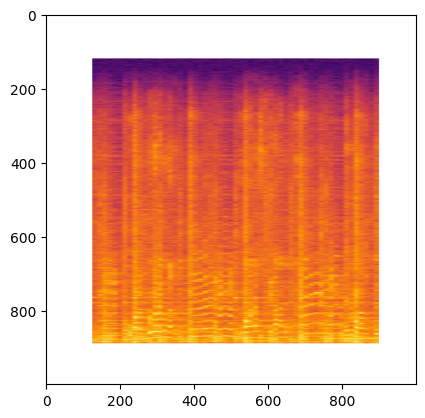

In [5]:
img = plt.imread('blues.00000.wav.png')
plt.imshow(img)

#### Data Preprocessing

In [7]:
!dir "./genres/"

 磁碟區 C 中的磁碟是 OS
 磁碟區序號:  221C-7CE4

 C:\Python\Level_III\Day14\genres 的目錄

2023/05/11  下午 11:54    <DIR>          .
2023/05/19  下午 08:25    <DIR>          ..
2021/11/17  下午 03:18    <DIR>          .ipynb_checkpoints
2023/05/11  下午 11:53            64,978 bextract_single.mf
2023/05/11  下午 11:53             5,902 bl.mf
2023/05/11  下午 11:53    <DIR>          blues
2023/05/11  下午 11:53             6,702 cl.mf
2023/05/11  下午 11:53    <DIR>          classical
2023/05/11  下午 11:53             6,302 co.mf
2023/05/11  下午 11:53    <DIR>          country
2023/05/11  下午 11:53                 0 data.csv
2023/05/11  下午 11:53             5,902 di.mf
2023/05/11  下午 11:53    <DIR>          disco
2023/05/11  下午 11:53             6,102 hi.mf
2023/05/11  下午 11:53    <DIR>          hiphop
2023/05/11  下午 11:53            59,200 input.mf
2023/05/11  下午 11:53             5,702 ja.mf
2023/05/11  下午 11:54    <DIR>          jazz
2023/05/11  下午 11:53             5,902 me.mf
2023/05/11  下午 11:54    <DIR>          

In [9]:
# 讀取標籤

path = './genres/'
file = 'input.mf'

import pandas as pd
df = pd.read_csv(path + file, header = None, delimiter = '\t', names = ['fullpath', 'style'])
df[:9]

,fullpath,style
0,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
1,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
2,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
3,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
4,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
5,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
6,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
7,/Users/sness/mirex2008/genres/blues/blues.0000...,blues
8,/Users/sness/mirex2008/genres/blues/blues.0000...,blues


In [10]:
# 找第一個範例
df[:1]['fullpath'][0]

'/Users/sness/mirex2008/genres/blues/blues.00000.wav'

In [11]:
%pwd

'C:\\Python\\Level_III\\Day14'

In [12]:
#檔案確實存在
!dir ".\\genres\\blues\\blues.00000.wav"

 磁碟區 C 中的磁碟是 OS
 磁碟區序號:  221C-7CE4

 C:\Python\Level_III\Day14\genres\blues 的目錄

2023/05/11  下午 11:53         1,323,632 blues.00000.wav
               1 個檔案       1,323,632 位元組
               0 個目錄  350,443,126,784 位元組可用


In [13]:
# 取出檔案名稱-part1
df[:3]['fullpath'].apply(lambda x:x.split('/')[-2:]).values

array([list(['blues', 'blues.00000.wav']),
       list(['blues', 'blues.00001.wav']),
       list(['blues', 'blues.00002.wav'])], dtype=object)

In [14]:
# 取出檔案名稱-part2
df[:3]['fullpath'].apply(lambda x:path + '/'.join(x.split('/')[-2:]))

0    ./genres/blues/blues.00000.wav
1    ./genres/blues/blues.00001.wav
2    ./genres/blues/blues.00002.wav
Name: fullpath, dtype: object

In [16]:
# 此為檔案真正的路徑
df['filename'] = df['fullpath'].apply(lambda x:path + '/'.join(x.split('/')[-2:]))
df[:9]

,fullpath,style,filename
0,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00000.wav
1,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00001.wav
2,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00002.wav
3,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00003.wav
4,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00004.wav
5,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00005.wav
6,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00006.wav
7,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00007.wav
8,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00008.wav


In [17]:
# 分析文件的內容數據
df.groupby('style')[['filename']].count()
dfagg = df.groupby('style')[['filename']].count()
dfagg

,filename
style,
blues,100
classical,100
country,100
disco,100
hiphop,100
jazz,100
metal,100
pop,100
reggae,100


In [18]:
dfagg.index

Index(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal',
       'pop', 'reggae', 'rock'],
      dtype='object', name='style')

In [20]:
'''
# os.walk：For each directory in the directory tree rooted at top
# (including top itself, but excluding '.' and '..'), yields a 3-tuple
'''
import os
os.walk?

In [21]:
import os
from os.path import join, getsize
for root, dirs, files in os.walk(path):
    print(root, 'consumes', end = '')
    print(sum(getsize(join(root, name)) for name in files), end = '')
    print('bytes in', len(files), 'non-directory files')

./genres/ consumes183998bytes in 13 non-directory files
./genres/.ipynb_checkpoints consumes0bytes in 0 non-directory files
./genres/blues consumes132363200bytes in 100 non-directory files
./genres/classical consumes132427620bytes in 100 non-directory files
./genres/country consumes132409952bytes in 100 non-directory files
./genres/disco consumes132391360bytes in 100 non-directory files
./genres/hiphop consumes132698048bytes in 100 non-directory files
./genres/jazz consumes132451056bytes in 100 non-directory files
./genres/metal consumes132323760bytes in 100 non-directory files
./genres/pop consumes132305200bytes in 100 non-directory files
./genres/reggae consumes132328980bytes in 100 non-directory files
./genres/rock consumes132406516bytes in 100 non-directory files


In [22]:
# 確認文件內容所在的檔案個數 = 實際檔案的每一個類別的個數
import os
from os.path import join, getsize
for root, dirs, files in os.walk(path):
    if (root.split('/')[-1]) in dfagg.index: 
        print(root, 'consumes', end = '')
        print(sum(getsize(join(root, name)) for name in files), end = '')
        print('bytes in', len(files), 'non-directory files')

./genres/blues consumes132363200bytes in 100 non-directory files
./genres/classical consumes132427620bytes in 100 non-directory files
./genres/country consumes132409952bytes in 100 non-directory files
./genres/disco consumes132391360bytes in 100 non-directory files
./genres/hiphop consumes132698048bytes in 100 non-directory files
./genres/jazz consumes132451056bytes in 100 non-directory files
./genres/metal consumes132323760bytes in 100 non-directory files
./genres/pop consumes132305200bytes in 100 non-directory files
./genres/reggae consumes132328980bytes in 100 non-directory files
./genres/rock consumes132406516bytes in 100 non-directory files


In [23]:
# 取出特徵
import librosa
songname = './genres/blues/blues.00000.wav'
y, sr = librosa.load(songname, mono = True, duration = 30)
chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y = y, sr = sr)
chroma_stft

array([[0.33112547, 0.2349237 , 0.8714165 , ..., 0.14128597, 0.15691063,
        0.8490139 ],
       [0.39392972, 0.29400364, 0.68826514, ..., 0.14279746, 0.13222207,
        0.78925467],
       [0.42932412, 0.41955492, 0.51602733, ..., 0.40771392, 0.25044867,
        0.716757  ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.1719772 , 0.2619948 ,
        0.92883295],
       [0.4203325 , 0.36797962, 0.6217583 , ..., 1.        , 1.        ,
        1.        ],
       [0.3034829 , 0.19700052, 0.64925486, ..., 0.99700594, 0.6287609 ,
        0.7215836 ]], dtype=float32)

In [24]:
chroma_stft.shape

(12, 1292)

In [25]:
import numpy as np
np.mean(chroma_stft)

0.34995052

In [ ]:
# Question1:mfcc
# Question2:rmse

In [26]:
mfcc.shape

(20, 1292)

In [27]:
# 拆解mfcc
for i, e in enumerate(mfcc):
    print(i, np.mean(e))

0 -113.619385
1 121.55302
2 -19.151056
3 42.345768
4 -6.3711677
5 18.613033
6 -13.69206
7 15.339378
8 -12.283617
9 10.973776
10 -8.32241
11 8.8067875
12 -3.665802
13 5.745939
14 -5.161711
15 0.7502978
16 -1.688358
17 -0.40932855
18 -2.298869
19 1.219947


In [28]:
# rmse
# 取出特徵

import librosa
songname = './genres/blues/blues.00000.wav'
y, sr = librosa.load(songname, mono = True, duration = 30)
chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
# rmse = librosa.feature.rmse(y = y, sr = sr) # <--------這裡解開會出錯
spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y = y, sr = sr)
chroma_stft

# ---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# C:\Users\LEWIS_~1\AppData\Local\Temp/ipykernel_31348/594039209.py in <module>
#       7 y, sr = librosa.load(songname, mono=True, duration=30)
#       8 chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
# ----> 9 rmse = librosa.feature.rmse(y=y, sr=sr)
#      10 spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#      11 spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# AttributeError: module 'librosa.feature' has no attribute 'rmse'

array([[0.33112547, 0.2349237 , 0.8714165 , ..., 0.14128597, 0.15691063,
        0.8490139 ],
       [0.39392972, 0.29400364, 0.68826514, ..., 0.14279746, 0.13222207,
        0.78925467],
       [0.42932412, 0.41955492, 0.51602733, ..., 0.40771392, 0.25044867,
        0.716757  ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.1719772 , 0.2619948 ,
        0.92883295],
       [0.4203325 , 0.36797962, 0.6217583 , ..., 1.        , 1.        ,
        1.        ],
       [0.3034829 , 0.19700052, 0.64925486, ..., 0.99700594, 0.6287609 ,
        0.7215836 ]], dtype=float32)

In [29]:
# 修正後寫法
# rmse = librosa.feature.rms(y = y)[0]
import librosa
songname = './genres/blues/blues.00000.wav'
y, sr = librosa.load(songname, mono = True, duration = 30)
chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
rmse = librosa.feature.rms(y = y)[0]
spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y = y, sr = sr)
rmse, np.mean(rmse)

(array([0.01908039, 0.03683019, 0.0497628 , ..., 0.1287345 , 0.14040096,
        0.1182173 ], dtype=float32),
 0.130192)

In [30]:
# run loop
df[:3]['filename'].tolist()

['./genres/blues/blues.00000.wav',
 './genres/blues/blues.00001.wav',
 './genres/blues/blues.00002.wav']

In [31]:
# run loop
from tqdm import tqdm
for songname in df[:10]['filename'].tolist():
    y, sr = librosa.load(songname, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)[0]
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    print(songname , np.mean(rmse))

./genres/blues/blues.00000.wav 0.130192
./genres/blues/blues.00001.wav 0.095891684
./genres/blues/blues.00002.wav 0.17549369
./genres/blues/blues.00003.wav 0.14113921
./genres/blues/blues.00004.wav 0.0915404
./genres/blues/blues.00005.wav 0.10343772
./genres/blues/blues.00006.wav 0.1416879
./genres/blues/blues.00007.wav 0.13174523
./genres/blues/blues.00008.wav 0.14236063
./genres/blues/blues.00009.wav 0.08132098


In [32]:
# run loop
from tqdm import tqdm
for songname in tqdm(df[:]['filename'].tolist()):
    y, sr = librosa.load(songname, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)[0]
    spec_cent = librosa.feature.spectral_centroid(y=y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    # print(songname , np.mean(rmse))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:29<00:00,  2.57it/s]


In [33]:
mfcc.shape

(20, 1292)

In [34]:
np.mean(mfcc, axis = 1).shape

(20,)

In [35]:
# .. .. .. .. .. .. .. .......... .. <-- header
# NN NN NN NN NN NN NN .mfcc1-20. NN <-- np.hstack((.., .., .., ..))
# NN NN NN NN NN NN NN .mfcc1-20. NN <-- np.hstack((.., .., .., ..))
import pandas as pd
data = pd.DataFrame()
for songname in df[:2]['filename'].tolist():
    print(songname)
    y, sr = librosa.load(songname, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)[0]
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    
    row = np.hstack((songname.split('/')[-1],
                     np.mean(chroma_stft),
                     np.mean(rmse),
                     np.mean(spec_cent),
                     np.mean(spec_bw),
                     np.mean(rolloff),
                     np.mean(zcr),                
                     np.mean(mfcc, axis = 1)
                   ))
    print(row)

./genres/blues/blues.00000.wav
['blues.00000.wav' '0.34995052' '0.130192' '1784.4165456667672'
 '2002.6571062203575' '3806.4186497738488' '0.08306639113293343'
 '-113.619385' '121.55302' '-19.151056' '42.345768' '-6.3711677'
 '18.613033' '-13.69206' '15.339378' '-12.283617' '10.973776' '-8.32241'
 '8.8067875' '-3.665802' '5.745939' '-5.161711' '0.7502978' '-1.688358'
 '-0.40932855' '-2.298869' '1.219947']
./genres/blues/blues.00001.wav
['blues.00001.wav' '0.3409451' '0.095891684' '1529.8713139905358'
 '2038.6121426557386' '3548.9868730952494' '0.056044256724071206'
 '-207.58151' '123.99715' '8.939115' '35.870758' '2.9199703' '21.518787'
 '-8.555369' '23.355938' '-10.101037' '11.906445' '-5.5581226' '5.375942'
 '-2.2378328' '4.2171254' '-6.0110474' '0.93266803' '-0.7170279'
 '0.29233325' '-0.28571686' '0.53214425']


In [36]:
df[:5]

,fullpath,style,filename
0,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00000.wav
1,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00001.wav
2,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00002.wav
3,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00003.wav
4,/Users/sness/mirex2008/genres/blues/blues.0000...,blues,./genres/blues/blues.00004.wav


In [37]:
# 對應出答案
for songname in df[-10:]['filename'].tolist():
    print(df[df.filename == songname]['style'].tolist()[0])
    # print(songname)

rock
rock
rock
rock
rock
rock
rock
rock
rock
rock


In [38]:
# .. .. .. .. .. .. .. .......... .. <-- header
# NN NN NN NN NN NN NN .mfcc1-20. NN <-- np.hstack((.., .., .., ..))
# NN NN NN NN NN NN NN .mfcc1-20. NN <-- np.hstack((.., .., .., ..))
import pandas as pd
data = pd.DataFrame()
for songname in df[:2]['filename'].tolist():
    # print(songname)
    label = df[df.filename == songname]['style'].tolist()[0]
    y, sr = librosa.load(songname, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)[0]
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)

    row = np.hstack((songname.split('/')[-1],
                     np.mean(chroma_stft),
                     np.mean(rmse),
                     np.mean(spec_cent),
                     np.mean(spec_bw),
                     np.mean(rolloff),
                     np.mean(zcr),                
                     np.mean(mfcc, axis = 1),
                     label
                    ))
    print(row)

['blues.00000.wav' '0.34995052' '0.130192' '1784.4165456667672'
 '2002.6571062203575' '3806.4186497738488' '0.08306639113293343'
 '-113.619385' '121.55302' '-19.151056' '42.345768' '-6.3711677'
 '18.613033' '-13.69206' '15.339378' '-12.283617' '10.973776' '-8.32241'
 '8.8067875' '-3.665802' '5.745939' '-5.161711' '0.7502978' '-1.688358'
 '-0.40932855' '-2.298869' '1.219947' 'blues']
['blues.00001.wav' '0.3409451' '0.095891684' '1529.8713139905358'
 '2038.6121426557386' '3548.9868730952494' '0.056044256724071206'
 '-207.58151' '123.99715' '8.939115' '35.870758' '2.9199703' '21.518787'
 '-8.555369' '23.355938' '-10.101037' '11.906445' '-5.5581226' '5.375942'
 '-2.2378328' '4.2171254' '-6.0110474' '0.93266803' '-0.7170279'
 '0.29233325' '-0.28571686' '0.53214425' 'blues']


In [39]:
# 將每一數據新增到DataFrame(bad)
import pandas as pd
data = pd.DataFrame()
data = data.append(pd.DataFrame(row))
data

C:\Users\User\AppData\Local\Temp\ipykernel_12772\4135498759.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame(row))


,0
0,blues.00001.wav
1,0.3409451
2,0.095891684
3,1529.8713139905358
4,2038.6121426557386
5,3548.9868730952494
6,0.056044256724071206
7,-207.58151
8,123.99715
9,8.939115


In [57]:
# 將每一數據新增到 DataFrame(better)
import pandas as pd
data = pd.DataFrame()
data = pd.concat([data, pd.DataFrame(row.reshape(1, -1))])
# data = data.append(pd.DataFrame(row.reshape(1, -1))) ----> FutureWarning:The frame.append method is deprecated and will be removed from pandas in a future version.
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,jazz.00081.wav,0.44186088,0.043215886,3027.140362364138,3302.6763016970644,7278.83931918779,0.10014829842298761,-228.37154,67.53677,37.07984,...,3.8471446,1.5821794,2.832255,0.04377567,-0.19756225,2.3157344,3.2987049,4.046379,-0.18987423,jazz


In [58]:
# .. .. .. .. .. .. .. .......... .. <-- header
# NN NN NN NN NN NN NN .mfcc1-20. NN <-- np.hstack((.., .., .., ..))
# NN NN NN NN NN NN NN .mfcc1-20. NN <-- np.hstack((.., .., .., ..))
import pandas as pd
data = pd.DataFrame()
for songname in df[:5]['filename'].tolist():
    # print(songname)
    label = df[df.filename == songname]['style'].tolist()[0]
    y, sr = librosa.load(songname, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)[0]
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    
    row = np.hstack((songname.split('/')[-1],
                     np.mean(chroma_stft),
                     np.mean(rmse),
                     np.mean(spec_cent),
                     np.mean(spec_bw),
                     np.mean(rolloff),
                     np.mean(zcr),                
                     np.mean(mfcc, axis = 1),
                     label
                    ))
    data = pd.concat([data, pd.DataFrame(row.reshape(1, -1))])
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,blues.00000.wav,0.34995052,0.130192,1784.4165456667672,2002.6571062203575,3806.4186497738488,0.08306639113293343,-113.619385,121.55302,-19.151056,...,8.8067875,-3.665802,5.745939,-5.161711,0.7502978,-1.688358,-0.40932855,-2.298869,1.219947,blues
0,blues.00001.wav,0.3409451,0.095891684,1529.8713139905358,2038.6121426557386,3548.9868730952494,0.056044256724071206,-207.58151,123.99715,8.939115,...,5.375942,-2.2378328,4.2171254,-6.0110474,0.93266803,-0.7170279,0.29233325,-0.28571686,0.53214425,blues
0,blues.00002.wav,0.36356187,0.17549369,1552.6377862410238,1747.3820283592033,3041.0899442784926,0.07630074799245357,-90.776344,140.44861,-29.10056,...,5.7857633,-8.899733,-1.0870236,-9.216774,2.4536483,-7.721793,-1.8164973,-3.4343538,-2.2313912,blues
0,blues.00003.wav,0.40484834,0.14113921,1070.1100590065275,1596.24420438572,2185.0617872303114,0.03330894446594427,-199.462,150.09473,5.649167,...,6.085354,-2.4761884,-1.0762246,-2.8760564,0.77690876,-3.3200555,0.6372628,-0.6175069,-3.40694,blues
0,blues.00004.wav,0.30859816,0.0915404,1835.5070085087575,1748.3674768917706,3581.003346162684,0.1015001421004257,-160.29185,126.19576,-35.602497,...,-2.8098488,-6.935621,-7.5592937,-9.172152,-4.5104084,-5.4537363,-0.92446786,-4.408076,-11.701833,blues


In [59]:
# 標題
# dataFrame
cols = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']
for m in range(1, 21):
    cols.append('mfcc' + str(m))
cols.append('style')
print(cols)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'style']


In [60]:
data.columns = cols 
data[:3]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,style
0,blues.00000.wav,0.34995052,0.130192,1784.4165456667672,2002.6571062203575,3806.4186497738488,0.08306639113293343,-113.619385,121.55302,-19.151056,...,8.8067875,-3.665802,5.745939,-5.161711,0.7502978,-1.688358,-0.40932855,-2.298869,1.219947,blues
0,blues.00001.wav,0.3409451,0.095891684,1529.8713139905358,2038.6121426557386,3548.9868730952494,0.056044256724071206,-207.58151,123.99715,8.939115,...,5.375942,-2.2378328,4.2171254,-6.0110474,0.93266803,-0.7170279,0.29233325,-0.28571686,0.53214425,blues
0,blues.00002.wav,0.36356187,0.17549369,1552.6377862410238,1747.3820283592033,3041.0899442784926,0.07630074799245357,-90.776344,140.44861,-29.10056,...,5.7857633,-8.899733,-1.0870236,-9.216774,2.4536483,-7.721793,-1.8164973,-3.4343538,-2.2313912,blues


In [61]:
# 注意資料型態
data.dtypes

filename              object
chroma_stft           object
rmse                  object
spectral_centroid     object
spectral_bandwidth    object
rolloff               object
zero_crossing_rate    object
mfcc1                 object
mfcc2                 object
mfcc3                 object
mfcc4                 object
mfcc5                 object
mfcc6                 object
mfcc7                 object
mfcc8                 object
mfcc9                 object
mfcc10                object
mfcc11                object
mfcc12                object
mfcc13                object
mfcc14                object
mfcc15                object
mfcc16                object
mfcc17                object
mfcc18                object
mfcc19                object
mfcc20                object
style                 object
dtype: object

In [62]:
# Getting features from audio files
import librosa
import numpy as np
from tqdm import tqdm
data = pd.DataFrame()
for songname in tqdm(df.filename.to_list()[:]):
    label = df[df.filename == songname]['style'].tolist()[0]
    y, sr = librosa.load(songname, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse =  librosa.feature.rms(y = y)[0]
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    row = np.hstack((songname.split('/')[-1],
                     np.mean(chroma_stft),
                     np.mean(rmse),
                     np.mean(spec_cent),
                     np.mean(spec_bw),
                     np.mean(rolloff),
                     np.mean(zcr),                
                     (np.mean(mfcc, axis = 1)),
                     label
                    ))
    # print(row)
    data = pd.concat([data, pd.DataFrame(row.reshape(1, -1))])
data.columns = cols

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:32<00:00,  1.23it/s]


In [63]:
# check size
data.shape

(1000, 28)

In [64]:
data.to_pickle('data.pickle')

In [65]:
# For skip data preprocessing
import pandas as pd
sample = pd.read_pickle('data.pickle')
sample[:3]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,style
0,blues.00000.wav,0.34995052,0.130192,1784.4165456667672,2002.6571062203575,3806.4186497738488,0.08306639113293343,-113.619385,121.55302,-19.151056,...,8.8067875,-3.665802,5.745939,-5.161711,0.7502978,-1.688358,-0.40932855,-2.298869,1.219947,blues
0,blues.00001.wav,0.3409451,0.095891684,1529.8713139905358,2038.6121426557386,3548.9868730952494,0.056044256724071206,-207.58151,123.99715,8.939115,...,5.375942,-2.2378328,4.2171254,-6.0110474,0.93266803,-0.7170279,0.29233325,-0.28571686,0.53214425,blues
0,blues.00002.wav,0.36356187,0.17549369,1552.6377862410238,1747.3820283592033,3041.0899442784926,0.07630074799245357,-90.776344,140.44861,-29.10056,...,5.7857633,-8.899733,-1.0870236,-9.216774,2.4536483,-7.721793,-1.8164973,-3.4343538,-2.2313912,blues


## Classification of Songs via Machine Learning

In [ ]:
# X, y
# y <-- one-hot encoder or label encoder
# X <-- data type astype('float32')
# standarization(optional)
# train_test_split
# build model with algorithm(classification)
# model.fit
# model.score & model.predict

In [66]:
# y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_raw = sample.iloc[:, -1].values
y = le.fit_transform(y_raw)
y_inv = le.inverse_transform(y) # 從代碼找名稱
y[:3], y_inv[:3], \
y[-3:], y_inv[-3:]

(array([0, 0, 0]),
 array(['blues', 'blues', 'blues'], dtype=object),
 array([9, 9, 9]),
 array(['rock', 'rock', 'rock'], dtype=object))

In [67]:
# X ---> 頭filename、尾style去掉
X = sample.iloc[:, 1:-1].values.astype('float64')
X[:3]

array([[ 3.49950520e-01,  1.30192000e-01,  1.78441655e+03,
         2.00265711e+03,  3.80641865e+03,  8.30663911e-02,
        -1.13619385e+02,  1.21553020e+02, -1.91510560e+01,
         4.23457680e+01, -6.37116770e+00,  1.86130330e+01,
        -1.36920600e+01,  1.53393780e+01, -1.22836170e+01,
         1.09737760e+01, -8.32241000e+00,  8.80678750e+00,
        -3.66580200e+00,  5.74593900e+00, -5.16171100e+00,
         7.50297800e-01, -1.68835800e+00, -4.09328550e-01,
        -2.29886900e+00,  1.21994700e+00],
       [ 3.40945100e-01,  9.58916840e-02,  1.52987131e+03,
         2.03861214e+03,  3.54898687e+03,  5.60442567e-02,
        -2.07581510e+02,  1.23997150e+02,  8.93911500e+00,
         3.58707580e+01,  2.91997030e+00,  2.15187870e+01,
        -8.55536900e+00,  2.33559380e+01, -1.01010370e+01,
         1.19064450e+01, -5.55812260e+00,  5.37594200e+00,
        -2.23783280e+00,  4.21712540e+00, -6.01104740e+00,
         9.32668030e-01, -7.17027900e-01,  2.92333250e-01,
        -2.85

In [68]:
# 加入資料前處理 MinMaxScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [69]:
# 分割數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 1234)

In [70]:
# 確認數據種類、個數
import numpy as np
np.bincount(y_train)

array([84, 77, 79, 77, 79, 80, 87, 78, 78, 81], dtype=int64)

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# model = ExtraTreesClassifier()
# model = MLPClassifier(max_iter = 1000)
# model = RandomForestClassifier()
# model = LogisticRegression(max_iter = 1000)
# model = KNeighborsClassifier(n_neighbors = 10)
model = LinearSVC(max_iter = 4000)
model.fit(X_train, y_train)

LinearSVC(max_iter=4000)

In [72]:
model.score(X_train, y_train), model.score(X_test, y_test)
# (0.99875, 0.645) wo standardization
# (0.99875, 0.635) w standardization

(0.70625, 0.605)

## Classification of Songs via Deep Learning_SGD

In [73]:
# For skip data preprocessing
import pandas as pd
sample = pd.read_pickle('data.pickle')
sample[:3]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,style
0,blues.00000.wav,0.34995052,0.130192,1784.4165456667672,2002.6571062203575,3806.4186497738488,0.08306639113293343,-113.619385,121.55302,-19.151056,...,8.8067875,-3.665802,5.745939,-5.161711,0.7502978,-1.688358,-0.40932855,-2.298869,1.219947,blues
0,blues.00001.wav,0.3409451,0.095891684,1529.8713139905358,2038.6121426557386,3548.9868730952494,0.056044256724071206,-207.58151,123.99715,8.939115,...,5.375942,-2.2378328,4.2171254,-6.0110474,0.93266803,-0.7170279,0.29233325,-0.28571686,0.53214425,blues
0,blues.00002.wav,0.36356187,0.17549369,1552.6377862410238,1747.3820283592033,3041.0899442784926,0.07630074799245357,-90.776344,140.44861,-29.10056,...,5.7857633,-8.899733,-1.0870236,-9.216774,2.4536483,-7.721793,-1.8164973,-3.4343538,-2.2313912,blues


In [ ]:
# X, y
# y <-- one-hot encoder or label encoder
# X <-- data type astype('float32')
# standarization(optional)
# train_test_split
# build model with algorithm
# model.fit
# model.score & model.predict

In [74]:
# y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_raw = sample.iloc[:, -1].values
y = le.fit_transform(y_raw)
y[:3]

array([0, 0, 0])

In [75]:
# X ---> 頭filename、尾style去掉
X = sample.iloc[:, 1:-1].values.astype('float32')
X[:3]

array([[ 3.49950522e-01,  1.30191997e-01,  1.78441650e+03,
         2.00265710e+03,  3.80641870e+03,  8.30663890e-02,
        -1.13619385e+02,  1.21553017e+02, -1.91510563e+01,
         4.23457680e+01, -6.37116766e+00,  1.86130333e+01,
        -1.36920605e+01,  1.53393784e+01, -1.22836170e+01,
         1.09737759e+01, -8.32240963e+00,  8.80678749e+00,
        -3.66580200e+00,  5.74593878e+00, -5.16171122e+00,
         7.50297785e-01, -1.68835795e+00, -4.09328550e-01,
        -2.29886889e+00,  1.21994698e+00],
       [ 3.40945095e-01,  9.58916843e-02,  1.52987134e+03,
         2.03861218e+03,  3.54898682e+03,  5.60442582e-02,
        -2.07581512e+02,  1.23997147e+02,  8.93911457e+00,
         3.58707581e+01,  2.91997027e+00,  2.15187874e+01,
        -8.55536938e+00,  2.33559380e+01, -1.01010370e+01,
         1.19064445e+01, -5.55812263e+00,  5.37594223e+00,
        -2.23783278e+00,  4.21712542e+00, -6.01104736e+00,
         9.32668030e-01, -7.17027903e-01,  2.92333245e-01,
        -2.85

In [76]:
# 加入資料前處理
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [77]:
# 分割數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 1234)

In [78]:
# 確認數據種類、個數
import numpy as np
np.bincount(y_train)

array([84, 77, 79, 77, 79, 80, 87, 78, 78, 81], dtype=int64)

In [79]:
# 導入函式庫 DNN, CNN, RNN
import numpy as np  
import keras
from keras.layers import Dense, Activation, Dropout # 神經層
from keras.utils import np_utils                    # 用來後續將label標籤轉為one-hot-encoding  

# 建立簡單的線性執行模型
model = keras.models.Sequential()

# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 256, input_dim = X_train.shape[1], 
                kernel_initializer = 'normal', activation = 'relu'))                # input + hidder layer
model.add(Dropout(.2))
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))   # hidder layer
model.add(Dropout(.2))
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu'))    # hidder layer
model.add(Dropout(.2))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax')) # Add output layer

# 選擇損失函數、優化方法及成效衡量方式sparse_categorical_crossentropy、categorical_crossentropy
# RMSProp SGD
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6912      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [80]:
y_TrainOneHot = np_utils.to_categorical(y_train).astype('int32')
y_TestOneHot = np_utils.to_categorical(y_test).astype('int32')

In [81]:
X_train.shape

(800, 26)

In [82]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 500,
                          batch_size = 10,
                          verbose = 2)
print('Done!!')

Epoch 1/500
64/64 - 2s - loss: 2.3009 - accuracy: 0.1125 - val_loss: 2.2987 - val_accuracy: 0.1312 - 2s/epoch - 25ms/step
Epoch 2/500
64/64 - 0s - loss: 2.2977 - accuracy: 0.1359 - val_loss: 2.2951 - val_accuracy: 0.1375 - 210ms/epoch - 3ms/step
Epoch 3/500
64/64 - 0s - loss: 2.2918 - accuracy: 0.1641 - val_loss: 2.2909 - val_accuracy: 0.1437 - 321ms/epoch - 5ms/step
Epoch 4/500
64/64 - 0s - loss: 2.2864 - accuracy: 0.1672 - val_loss: 2.2857 - val_accuracy: 0.1437 - 229ms/epoch - 4ms/step
Epoch 5/500
64/64 - 0s - loss: 2.2816 - accuracy: 0.1828 - val_loss: 2.2793 - val_accuracy: 0.1625 - 250ms/epoch - 4ms/step
Epoch 6/500
64/64 - 0s - loss: 2.2750 - accuracy: 0.1703 - val_loss: 2.2714 - val_accuracy: 0.1813 - 239ms/epoch - 4ms/step
Epoch 7/500
64/64 - 0s - loss: 2.2640 - accuracy: 0.2094 - val_loss: 2.2604 - val_accuracy: 0.1813 - 244ms/epoch - 4ms/step
Epoch 8/500
64/64 - 0s - loss: 2.2529 - accuracy: 0.2109 - val_loss: 2.2458 - val_accuracy: 0.2125 - 217ms/epoch - 3ms/step
Epoch 9/50

Epoch 67/500
64/64 - 0s - loss: 1.0740 - accuracy: 0.6109 - val_loss: 1.2273 - val_accuracy: 0.5688 - 196ms/epoch - 3ms/step
Epoch 68/500
64/64 - 0s - loss: 1.0346 - accuracy: 0.6469 - val_loss: 1.2121 - val_accuracy: 0.5875 - 197ms/epoch - 3ms/step
Epoch 69/500
64/64 - 0s - loss: 1.0141 - accuracy: 0.6531 - val_loss: 1.2195 - val_accuracy: 0.5875 - 200ms/epoch - 3ms/step
Epoch 70/500
64/64 - 0s - loss: 1.0141 - accuracy: 0.6594 - val_loss: 1.2127 - val_accuracy: 0.5875 - 202ms/epoch - 3ms/step
Epoch 71/500
64/64 - 0s - loss: 1.0034 - accuracy: 0.6469 - val_loss: 1.2053 - val_accuracy: 0.6000 - 199ms/epoch - 3ms/step
Epoch 72/500
64/64 - 0s - loss: 1.0049 - accuracy: 0.6297 - val_loss: 1.2035 - val_accuracy: 0.6000 - 209ms/epoch - 3ms/step
Epoch 73/500
64/64 - 0s - loss: 0.9787 - accuracy: 0.6594 - val_loss: 1.2018 - val_accuracy: 0.6000 - 197ms/epoch - 3ms/step
Epoch 74/500
64/64 - 0s - loss: 0.9443 - accuracy: 0.6578 - val_loss: 1.2055 - val_accuracy: 0.6000 - 221ms/epoch - 3ms/step


Epoch 133/500
64/64 - 0s - loss: 0.5498 - accuracy: 0.8156 - val_loss: 1.1171 - val_accuracy: 0.6625 - 200ms/epoch - 3ms/step
Epoch 134/500
64/64 - 0s - loss: 0.5777 - accuracy: 0.8000 - val_loss: 1.1246 - val_accuracy: 0.6562 - 178ms/epoch - 3ms/step
Epoch 135/500
64/64 - 0s - loss: 0.5645 - accuracy: 0.7969 - val_loss: 1.1285 - val_accuracy: 0.6500 - 206ms/epoch - 3ms/step
Epoch 136/500
64/64 - 0s - loss: 0.5267 - accuracy: 0.8250 - val_loss: 1.1240 - val_accuracy: 0.6687 - 193ms/epoch - 3ms/step
Epoch 137/500
64/64 - 0s - loss: 0.5614 - accuracy: 0.8156 - val_loss: 1.1031 - val_accuracy: 0.6500 - 178ms/epoch - 3ms/step
Epoch 138/500
64/64 - 0s - loss: 0.5247 - accuracy: 0.8172 - val_loss: 1.1130 - val_accuracy: 0.6562 - 169ms/epoch - 3ms/step
Epoch 139/500
64/64 - 0s - loss: 0.5057 - accuracy: 0.8406 - val_loss: 1.1281 - val_accuracy: 0.6562 - 169ms/epoch - 3ms/step
Epoch 140/500
64/64 - 0s - loss: 0.5500 - accuracy: 0.8047 - val_loss: 1.1241 - val_accuracy: 0.6500 - 169ms/epoch - 3

64/64 - 0s - loss: 0.2982 - accuracy: 0.9031 - val_loss: 1.3204 - val_accuracy: 0.6750 - 202ms/epoch - 3ms/step
Epoch 199/500
64/64 - 0s - loss: 0.3184 - accuracy: 0.8938 - val_loss: 1.3321 - val_accuracy: 0.6750 - 202ms/epoch - 3ms/step
Epoch 200/500
64/64 - 0s - loss: 0.2877 - accuracy: 0.9125 - val_loss: 1.3251 - val_accuracy: 0.6875 - 235ms/epoch - 4ms/step
Epoch 201/500
64/64 - 0s - loss: 0.2792 - accuracy: 0.9109 - val_loss: 1.3471 - val_accuracy: 0.6812 - 230ms/epoch - 4ms/step
Epoch 202/500
64/64 - 0s - loss: 0.3205 - accuracy: 0.8984 - val_loss: 1.3785 - val_accuracy: 0.6687 - 216ms/epoch - 3ms/step
Epoch 203/500
64/64 - 0s - loss: 0.2737 - accuracy: 0.8984 - val_loss: 1.3313 - val_accuracy: 0.6812 - 233ms/epoch - 4ms/step
Epoch 204/500
64/64 - 0s - loss: 0.2675 - accuracy: 0.9219 - val_loss: 1.3254 - val_accuracy: 0.6625 - 216ms/epoch - 3ms/step
Epoch 205/500
64/64 - 0s - loss: 0.2621 - accuracy: 0.9203 - val_loss: 1.3756 - val_accuracy: 0.6875 - 205ms/epoch - 3ms/step
Epoch 

Epoch 264/500
64/64 - 0s - loss: 0.1740 - accuracy: 0.9406 - val_loss: 1.5647 - val_accuracy: 0.6750 - 172ms/epoch - 3ms/step
Epoch 265/500
64/64 - 0s - loss: 0.1736 - accuracy: 0.9438 - val_loss: 1.5389 - val_accuracy: 0.7000 - 200ms/epoch - 3ms/step
Epoch 266/500
64/64 - 0s - loss: 0.1469 - accuracy: 0.9609 - val_loss: 1.5727 - val_accuracy: 0.6812 - 237ms/epoch - 4ms/step
Epoch 267/500
64/64 - 0s - loss: 0.1640 - accuracy: 0.9531 - val_loss: 1.6020 - val_accuracy: 0.6687 - 199ms/epoch - 3ms/step
Epoch 268/500
64/64 - 0s - loss: 0.1668 - accuracy: 0.9641 - val_loss: 1.6018 - val_accuracy: 0.6750 - 227ms/epoch - 4ms/step
Epoch 269/500
64/64 - 0s - loss: 0.1506 - accuracy: 0.9516 - val_loss: 1.5453 - val_accuracy: 0.6875 - 200ms/epoch - 3ms/step
Epoch 270/500
64/64 - 0s - loss: 0.1298 - accuracy: 0.9719 - val_loss: 1.5764 - val_accuracy: 0.6625 - 220ms/epoch - 3ms/step
Epoch 271/500
64/64 - 0s - loss: 0.1772 - accuracy: 0.9500 - val_loss: 1.6075 - val_accuracy: 0.6812 - 206ms/epoch - 3

64/64 - 0s - loss: 0.1122 - accuracy: 0.9625 - val_loss: 1.8218 - val_accuracy: 0.6875 - 218ms/epoch - 3ms/step
Epoch 330/500
64/64 - 0s - loss: 0.0975 - accuracy: 0.9797 - val_loss: 1.7967 - val_accuracy: 0.6750 - 200ms/epoch - 3ms/step
Epoch 331/500
64/64 - 0s - loss: 0.1120 - accuracy: 0.9656 - val_loss: 1.7719 - val_accuracy: 0.6812 - 225ms/epoch - 4ms/step
Epoch 332/500
64/64 - 0s - loss: 0.1123 - accuracy: 0.9609 - val_loss: 1.8444 - val_accuracy: 0.6750 - 223ms/epoch - 3ms/step
Epoch 333/500
64/64 - 0s - loss: 0.0896 - accuracy: 0.9750 - val_loss: 1.8223 - val_accuracy: 0.6812 - 235ms/epoch - 4ms/step
Epoch 334/500
64/64 - 0s - loss: 0.0929 - accuracy: 0.9797 - val_loss: 1.8197 - val_accuracy: 0.6750 - 233ms/epoch - 4ms/step
Epoch 335/500
64/64 - 0s - loss: 0.0943 - accuracy: 0.9719 - val_loss: 1.7491 - val_accuracy: 0.6938 - 230ms/epoch - 4ms/step
Epoch 336/500
64/64 - 0s - loss: 0.0931 - accuracy: 0.9734 - val_loss: 1.8162 - val_accuracy: 0.6812 - 234ms/epoch - 4ms/step
Epoch 

Epoch 395/500
64/64 - 0s - loss: 0.0807 - accuracy: 0.9719 - val_loss: 1.8435 - val_accuracy: 0.6875 - 182ms/epoch - 3ms/step
Epoch 396/500
64/64 - 0s - loss: 0.0765 - accuracy: 0.9781 - val_loss: 1.8893 - val_accuracy: 0.6750 - 220ms/epoch - 3ms/step
Epoch 397/500
64/64 - 0s - loss: 0.0720 - accuracy: 0.9750 - val_loss: 1.9247 - val_accuracy: 0.6750 - 237ms/epoch - 4ms/step
Epoch 398/500
64/64 - 0s - loss: 0.0677 - accuracy: 0.9812 - val_loss: 1.8896 - val_accuracy: 0.7063 - 223ms/epoch - 3ms/step
Epoch 399/500
64/64 - 0s - loss: 0.0905 - accuracy: 0.9750 - val_loss: 1.8469 - val_accuracy: 0.7000 - 238ms/epoch - 4ms/step
Epoch 400/500
64/64 - 0s - loss: 0.0550 - accuracy: 0.9891 - val_loss: 1.8336 - val_accuracy: 0.7063 - 196ms/epoch - 3ms/step
Epoch 401/500
64/64 - 0s - loss: 0.0737 - accuracy: 0.9766 - val_loss: 1.9091 - val_accuracy: 0.6875 - 204ms/epoch - 3ms/step
Epoch 402/500
64/64 - 0s - loss: 0.0632 - accuracy: 0.9828 - val_loss: 1.8335 - val_accuracy: 0.6938 - 238ms/epoch - 4

64/64 - 0s - loss: 0.0563 - accuracy: 0.9828 - val_loss: 2.0320 - val_accuracy: 0.6875 - 191ms/epoch - 3ms/step
Epoch 461/500
64/64 - 0s - loss: 0.0611 - accuracy: 0.9875 - val_loss: 1.9970 - val_accuracy: 0.6812 - 184ms/epoch - 3ms/step
Epoch 462/500
64/64 - 0s - loss: 0.0485 - accuracy: 0.9844 - val_loss: 2.0013 - val_accuracy: 0.6812 - 200ms/epoch - 3ms/step
Epoch 463/500
64/64 - 0s - loss: 0.0520 - accuracy: 0.9859 - val_loss: 2.0365 - val_accuracy: 0.6875 - 226ms/epoch - 4ms/step
Epoch 464/500
64/64 - 0s - loss: 0.0512 - accuracy: 0.9812 - val_loss: 1.9987 - val_accuracy: 0.6875 - 225ms/epoch - 4ms/step
Epoch 465/500
64/64 - 0s - loss: 0.0422 - accuracy: 0.9891 - val_loss: 1.9999 - val_accuracy: 0.6812 - 225ms/epoch - 4ms/step
Epoch 466/500
64/64 - 0s - loss: 0.0675 - accuracy: 0.9766 - val_loss: 2.0593 - val_accuracy: 0.6938 - 210ms/epoch - 3ms/step
Epoch 467/500
64/64 - 0s - loss: 0.0586 - accuracy: 0.9844 - val_loss: 2.0492 - val_accuracy: 0.6812 - 215ms/epoch - 3ms/step
Epoch 

In [83]:
scores = model.evaluate(X_test, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

7/7 [==============================] - 0s 4ms/step - loss: 2.4010 - accuracy: 0.6500

	[Info] Accuracy of testing data = 65.0%


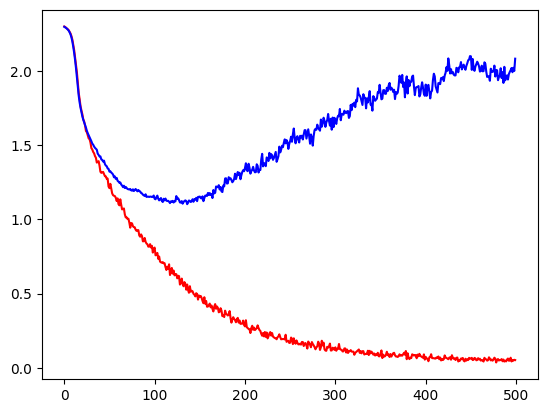

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.show()

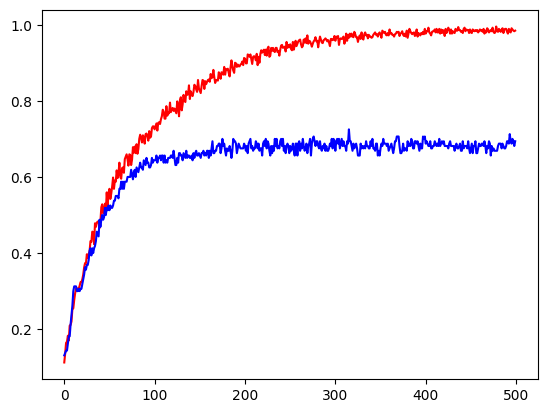

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.show()

## Classification of Songs via Deep Learning_RNN

In [86]:
# For skip data preprocessing
import pandas as pd
sample = pd.read_pickle('data.pickle')
sample[:3]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,style
0,blues.00000.wav,0.34995052,0.130192,1784.4165456667672,2002.6571062203575,3806.4186497738488,0.08306639113293343,-113.619385,121.55302,-19.151056,...,8.8067875,-3.665802,5.745939,-5.161711,0.7502978,-1.688358,-0.40932855,-2.298869,1.219947,blues
0,blues.00001.wav,0.3409451,0.095891684,1529.8713139905358,2038.6121426557386,3548.9868730952494,0.056044256724071206,-207.58151,123.99715,8.939115,...,5.375942,-2.2378328,4.2171254,-6.0110474,0.93266803,-0.7170279,0.29233325,-0.28571686,0.53214425,blues
0,blues.00002.wav,0.36356187,0.17549369,1552.6377862410238,1747.3820283592033,3041.0899442784926,0.07630074799245357,-90.776344,140.44861,-29.10056,...,5.7857633,-8.899733,-1.0870236,-9.216774,2.4536483,-7.721793,-1.8164973,-3.4343538,-2.2313912,blues


In [ ]:
# X, y
# y <-- one-hot encoder or label encoder
# X <-- data type astype('float32')
# standarization(optional)
# train_test_split
# build model with algorithm
# model.fit
# model.score & model.predict

In [87]:
# y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_raw = sample.iloc[:, -1].values
y = le.fit_transform(y_raw)
y[:3]

array([0, 0, 0])

In [88]:
# X ---> 頭filename、尾style去掉
X = sample.iloc[:, 1:-1].values.astype('float32')
X[:3]

array([[ 3.49950522e-01,  1.30191997e-01,  1.78441650e+03,
         2.00265710e+03,  3.80641870e+03,  8.30663890e-02,
        -1.13619385e+02,  1.21553017e+02, -1.91510563e+01,
         4.23457680e+01, -6.37116766e+00,  1.86130333e+01,
        -1.36920605e+01,  1.53393784e+01, -1.22836170e+01,
         1.09737759e+01, -8.32240963e+00,  8.80678749e+00,
        -3.66580200e+00,  5.74593878e+00, -5.16171122e+00,
         7.50297785e-01, -1.68835795e+00, -4.09328550e-01,
        -2.29886889e+00,  1.21994698e+00],
       [ 3.40945095e-01,  9.58916843e-02,  1.52987134e+03,
         2.03861218e+03,  3.54898682e+03,  5.60442582e-02,
        -2.07581512e+02,  1.23997147e+02,  8.93911457e+00,
         3.58707581e+01,  2.91997027e+00,  2.15187874e+01,
        -8.55536938e+00,  2.33559380e+01, -1.01010370e+01,
         1.19064445e+01, -5.55812263e+00,  5.37594223e+00,
        -2.23783278e+00,  4.21712542e+00, -6.01104736e+00,
         9.32668030e-01, -7.17027903e-01,  2.92333245e-01,
        -2.85

In [89]:
# 加入資料前處理
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [90]:
# 分割數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 1234)

In [91]:
# 確認數據種類、個數
import numpy as np
np.bincount(y_train)

array([84, 77, 79, 77, 79, 80, 87, 78, 78, 81], dtype=int64)

In [92]:
# RNN
# https://towardsdatascience.com/recurrent-neural-nets-for-audio-classification-81cb62327990
# CNN
# https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab
X_train.shape[1]

26

In [93]:
# 導入函式庫 DNN, CNN, RNN
import numpy as np  
import keras
from keras.layers import Dense, Activation, Dropout, LSTM, SimpleRNN, Bidirectional # 神經層
from keras.utils import np_utils # 用來後續將label標籤轉為one-hot-encoding  

# 建立簡單的線性執行的模型
model = keras.models.Sequential()

# # Add Input layer, 隱藏層(hidden layer)有256個輸出變數
# model.add(Dense(units=256, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu')) # input + hidder layer
# model.add(Dropout(.2))
# model.add(Dense(units=128, kernel_initializer='normal', activation='relu')) # hidder layer
# model.add(Dropout(.2))
# model.add(Dense(units=64, kernel_initializer='normal', activation='relu')) # hidder layer
# model.add(Dropout(.2))
# model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add output layer

input_shape = (X_train.shape[1], 1)
model = keras.Sequential()
model.add(Bidirectional(LSTM(128, input_shape = input_shape)))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(48, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式 sparse_categorical_crossentropy categorical_crossentropy
# RMSProp SGD
model.compile(loss = 'CategoricalCrossentropy', optimizer = 'RMSProp', metrics = ['accuracy'])
# model.summary()

In [94]:
y_TrainOneHot = np_utils.to_categorical(y_train).astype('int32')
y_TestOneHot = np_utils.to_categorical(y_test).astype('int32')

In [95]:
X_train.shape
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features)) # 多出一個維度
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features)) # 多出一個維度

In [96]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train,
                          y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 200, 
                          batch_size = 10, 
                          verbose = 2)
print('Done!!')

Epoch 1/200
64/64 - 10s - loss: 2.1662 - accuracy: 0.2109 - val_loss: 1.9924 - val_accuracy: 0.2562 - 10s/epoch - 149ms/step
Epoch 2/200
64/64 - 2s - loss: 2.0494 - accuracy: 0.2234 - val_loss: 1.9002 - val_accuracy: 0.2750 - 2s/epoch - 26ms/step
Epoch 3/200
64/64 - 2s - loss: 1.9785 - accuracy: 0.2313 - val_loss: 1.8258 - val_accuracy: 0.2937 - 2s/epoch - 28ms/step
Epoch 4/200
64/64 - 1s - loss: 1.8884 - accuracy: 0.2797 - val_loss: 1.7844 - val_accuracy: 0.3375 - 1s/epoch - 19ms/step
Epoch 5/200
64/64 - 1s - loss: 1.8512 - accuracy: 0.3219 - val_loss: 1.7706 - val_accuracy: 0.3438 - 1s/epoch - 20ms/step
Epoch 6/200
64/64 - 2s - loss: 1.7772 - accuracy: 0.3266 - val_loss: 1.7164 - val_accuracy: 0.3625 - 2s/epoch - 29ms/step
Epoch 7/200
64/64 - 2s - loss: 1.7945 - accuracy: 0.3344 - val_loss: 1.6562 - val_accuracy: 0.4187 - 2s/epoch - 29ms/step
Epoch 8/200
64/64 - 2s - loss: 1.7096 - accuracy: 0.3656 - val_loss: 1.7139 - val_accuracy: 0.3812 - 2s/epoch - 27ms/step
Epoch 9/200
64/64 - 2

Epoch 68/200
64/64 - 2s - loss: 0.7402 - accuracy: 0.7484 - val_loss: 1.5674 - val_accuracy: 0.5813 - 2s/epoch - 28ms/step
Epoch 69/200
64/64 - 2s - loss: 0.7302 - accuracy: 0.7484 - val_loss: 1.5729 - val_accuracy: 0.5875 - 2s/epoch - 27ms/step
Epoch 70/200
64/64 - 2s - loss: 0.7166 - accuracy: 0.7672 - val_loss: 1.6903 - val_accuracy: 0.6000 - 2s/epoch - 28ms/step
Epoch 71/200
64/64 - 2s - loss: 0.7732 - accuracy: 0.7500 - val_loss: 1.7256 - val_accuracy: 0.5938 - 2s/epoch - 28ms/step
Epoch 72/200
64/64 - 2s - loss: 0.7226 - accuracy: 0.7516 - val_loss: 1.8096 - val_accuracy: 0.5813 - 2s/epoch - 28ms/step
Epoch 73/200
64/64 - 2s - loss: 0.6688 - accuracy: 0.7688 - val_loss: 1.9284 - val_accuracy: 0.5813 - 2s/epoch - 27ms/step
Epoch 74/200
64/64 - 2s - loss: 0.6760 - accuracy: 0.7844 - val_loss: 1.9741 - val_accuracy: 0.5875 - 2s/epoch - 28ms/step
Epoch 75/200
64/64 - 2s - loss: 0.6808 - accuracy: 0.7781 - val_loss: 2.0058 - val_accuracy: 0.6000 - 2s/epoch - 26ms/step
Epoch 76/200
64/

Epoch 135/200
64/64 - 2s - loss: 0.3614 - accuracy: 0.9094 - val_loss: 4.0468 - val_accuracy: 0.6125 - 2s/epoch - 29ms/step
Epoch 136/200
64/64 - 2s - loss: 0.2837 - accuracy: 0.9172 - val_loss: 3.9288 - val_accuracy: 0.5875 - 2s/epoch - 28ms/step
Epoch 137/200
64/64 - 2s - loss: 0.3319 - accuracy: 0.8969 - val_loss: 4.1427 - val_accuracy: 0.5750 - 2s/epoch - 28ms/step
Epoch 138/200
64/64 - 2s - loss: 0.2510 - accuracy: 0.9062 - val_loss: 3.8539 - val_accuracy: 0.5813 - 2s/epoch - 28ms/step
Epoch 139/200
64/64 - 2s - loss: 0.3396 - accuracy: 0.9266 - val_loss: 3.4060 - val_accuracy: 0.5813 - 2s/epoch - 28ms/step
Epoch 140/200
64/64 - 2s - loss: 0.2427 - accuracy: 0.9203 - val_loss: 4.1687 - val_accuracy: 0.6062 - 2s/epoch - 28ms/step
Epoch 141/200
64/64 - 2s - loss: 0.2375 - accuracy: 0.9203 - val_loss: 4.2482 - val_accuracy: 0.5938 - 2s/epoch - 28ms/step
Epoch 142/200
64/64 - 2s - loss: 0.3106 - accuracy: 0.8984 - val_loss: 3.9294 - val_accuracy: 0.6062 - 2s/epoch - 28ms/step
Epoch 14

In [97]:
scores = model.evaluate(X_test, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

7/7 [==============================] - 2s 26ms/step - loss: 5.1717 - accuracy: 0.5600

	[Info] Accuracy of testing data = 56.0%


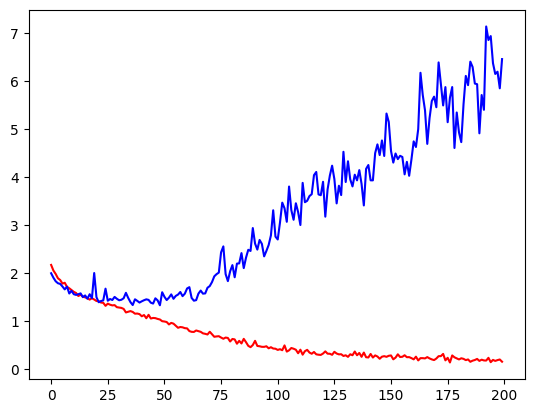

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.show()

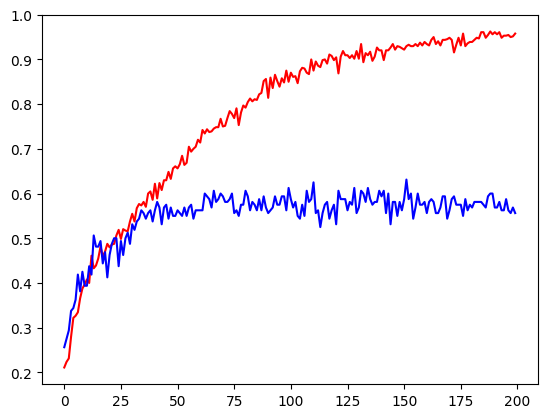

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.show()

## Classification of Songs via Deep Learning_RMSProp

In [100]:
# For skip data preprocessing
import pandas as pd
sample = pd.read_pickle('data.pickle')
sample[:3]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,style
0,blues.00000.wav,0.34995052,0.130192,1784.4165456667672,2002.6571062203575,3806.4186497738488,0.08306639113293343,-113.619385,121.55302,-19.151056,...,8.8067875,-3.665802,5.745939,-5.161711,0.7502978,-1.688358,-0.40932855,-2.298869,1.219947,blues
0,blues.00001.wav,0.3409451,0.095891684,1529.8713139905358,2038.6121426557386,3548.9868730952494,0.056044256724071206,-207.58151,123.99715,8.939115,...,5.375942,-2.2378328,4.2171254,-6.0110474,0.93266803,-0.7170279,0.29233325,-0.28571686,0.53214425,blues
0,blues.00002.wav,0.36356187,0.17549369,1552.6377862410238,1747.3820283592033,3041.0899442784926,0.07630074799245357,-90.776344,140.44861,-29.10056,...,5.7857633,-8.899733,-1.0870236,-9.216774,2.4536483,-7.721793,-1.8164973,-3.4343538,-2.2313912,blues


In [101]:
# y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_raw = sample.iloc[:, -1].values
y = le.fit_transform(y_raw)
y[:3]

array([0, 0, 0])

In [102]:
# X ---> 頭filename、尾style去掉
X = sample.iloc[:, 1:-1].values.astype('float32')
X[:3]

array([[ 3.49950522e-01,  1.30191997e-01,  1.78441650e+03,
         2.00265710e+03,  3.80641870e+03,  8.30663890e-02,
        -1.13619385e+02,  1.21553017e+02, -1.91510563e+01,
         4.23457680e+01, -6.37116766e+00,  1.86130333e+01,
        -1.36920605e+01,  1.53393784e+01, -1.22836170e+01,
         1.09737759e+01, -8.32240963e+00,  8.80678749e+00,
        -3.66580200e+00,  5.74593878e+00, -5.16171122e+00,
         7.50297785e-01, -1.68835795e+00, -4.09328550e-01,
        -2.29886889e+00,  1.21994698e+00],
       [ 3.40945095e-01,  9.58916843e-02,  1.52987134e+03,
         2.03861218e+03,  3.54898682e+03,  5.60442582e-02,
        -2.07581512e+02,  1.23997147e+02,  8.93911457e+00,
         3.58707581e+01,  2.91997027e+00,  2.15187874e+01,
        -8.55536938e+00,  2.33559380e+01, -1.01010370e+01,
         1.19064445e+01, -5.55812263e+00,  5.37594223e+00,
        -2.23783278e+00,  4.21712542e+00, -6.01104736e+00,
         9.32668030e-01, -7.17027903e-01,  2.92333245e-01,
        -2.85

In [103]:
# 加入資料前處理
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [104]:
# 分割數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 42)

In [105]:
# 確認數據種類、個數
import numpy as np
np.bincount(y_train)

array([80, 87, 73, 79, 85, 78, 75, 87, 77, 79], dtype=int64)

In [106]:
# 導入函式庫
import numpy as np
import keras
from keras.layers import Dense, Activation # 神經層
from keras.utils import np_utils           # 用來後續將 label 標籤轉為 one-hot-encoding  

# 建立簡單的線性執行的模型
model = keras.models.Sequential()

# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 256, input_dim = X_train.shape[1],
                kernel_initializer = 'normal', activation = 'relu'))                # input + hidder layer
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))   # hidder layer
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu'))    # hidder layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax')) # Add output layer

# 選擇損失函數、優化方法及成效衡量方式 sparse_categorical_crossentropy categorical_crossentropy
# RMSProp SGD
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSProp', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               6912      
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


In [107]:
y_TrainOneHot = np_utils.to_categorical(y_train).astype('int32')
y_TestOneHot = np_utils.to_categorical(y_test).astype('int32')

In [108]:
X_train.shape

(800, 26)

In [109]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train, 
                          y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 150, 
                          batch_size = 10, 
                          verbose = 2)
print('Done!!')

Epoch 1/150
64/64 - 1s - loss: 1.9418 - accuracy: 0.3094 - val_loss: 1.7089 - val_accuracy: 0.3625 - 662ms/epoch - 10ms/step
Epoch 2/150
64/64 - 0s - loss: 1.5159 - accuracy: 0.4203 - val_loss: 1.5264 - val_accuracy: 0.4125 - 187ms/epoch - 3ms/step
Epoch 3/150
64/64 - 0s - loss: 1.3299 - accuracy: 0.4875 - val_loss: 1.3573 - val_accuracy: 0.5063 - 209ms/epoch - 3ms/step
Epoch 4/150
64/64 - 0s - loss: 1.2072 - accuracy: 0.5531 - val_loss: 1.3722 - val_accuracy: 0.5375 - 227ms/epoch - 4ms/step
Epoch 5/150
64/64 - 0s - loss: 1.1295 - accuracy: 0.5781 - val_loss: 1.2657 - val_accuracy: 0.5437 - 211ms/epoch - 3ms/step
Epoch 6/150
64/64 - 0s - loss: 1.0492 - accuracy: 0.6281 - val_loss: 1.2623 - val_accuracy: 0.5813 - 218ms/epoch - 3ms/step
Epoch 7/150
64/64 - 0s - loss: 0.9902 - accuracy: 0.6266 - val_loss: 1.2525 - val_accuracy: 0.5688 - 200ms/epoch - 3ms/step
Epoch 8/150
64/64 - 0s - loss: 0.9476 - accuracy: 0.6578 - val_loss: 1.1412 - val_accuracy: 0.6438 - 218ms/epoch - 3ms/step
Epoch 9

Epoch 67/150
64/64 - 0s - loss: 0.0195 - accuracy: 0.9937 - val_loss: 3.4871 - val_accuracy: 0.6562 - 211ms/epoch - 3ms/step
Epoch 68/150
64/64 - 0s - loss: 0.0328 - accuracy: 0.9937 - val_loss: 3.3214 - val_accuracy: 0.7000 - 201ms/epoch - 3ms/step
Epoch 69/150
64/64 - 0s - loss: 0.0348 - accuracy: 0.9891 - val_loss: 3.3455 - val_accuracy: 0.6438 - 209ms/epoch - 3ms/step
Epoch 70/150
64/64 - 0s - loss: 0.0253 - accuracy: 0.9937 - val_loss: 3.2050 - val_accuracy: 0.6812 - 203ms/epoch - 3ms/step
Epoch 71/150
64/64 - 0s - loss: 0.0203 - accuracy: 0.9922 - val_loss: 3.6546 - val_accuracy: 0.6750 - 215ms/epoch - 3ms/step
Epoch 72/150
64/64 - 0s - loss: 0.0228 - accuracy: 0.9922 - val_loss: 3.3024 - val_accuracy: 0.7125 - 222ms/epoch - 3ms/step
Epoch 73/150
64/64 - 0s - loss: 0.0126 - accuracy: 0.9953 - val_loss: 3.3494 - val_accuracy: 0.6938 - 219ms/epoch - 3ms/step
Epoch 74/150
64/64 - 0s - loss: 0.0092 - accuracy: 0.9984 - val_loss: 3.3505 - val_accuracy: 0.7125 - 213ms/epoch - 3ms/step


Epoch 133/150
64/64 - 0s - loss: 0.0069 - accuracy: 0.9984 - val_loss: 5.4732 - val_accuracy: 0.6875 - 237ms/epoch - 4ms/step
Epoch 134/150
64/64 - 0s - loss: 0.0091 - accuracy: 0.9969 - val_loss: 5.2528 - val_accuracy: 0.7000 - 209ms/epoch - 3ms/step
Epoch 135/150
64/64 - 0s - loss: 0.0180 - accuracy: 0.9953 - val_loss: 6.0707 - val_accuracy: 0.6500 - 199ms/epoch - 3ms/step
Epoch 136/150
64/64 - 0s - loss: 0.0372 - accuracy: 0.9922 - val_loss: 5.4188 - val_accuracy: 0.7000 - 218ms/epoch - 3ms/step
Epoch 137/150
64/64 - 0s - loss: 0.0061 - accuracy: 0.9969 - val_loss: 5.6507 - val_accuracy: 0.6875 - 201ms/epoch - 3ms/step
Epoch 138/150
64/64 - 0s - loss: 0.0110 - accuracy: 0.9969 - val_loss: 5.4774 - val_accuracy: 0.6500 - 229ms/epoch - 4ms/step
Epoch 139/150
64/64 - 0s - loss: 0.0130 - accuracy: 0.9953 - val_loss: 5.4662 - val_accuracy: 0.6875 - 197ms/epoch - 3ms/step
Epoch 140/150
64/64 - 0s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 5.7511 - val_accuracy: 0.6812 - 208ms/epoch - 3

In [110]:
scores = model.evaluate(X_test, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

7/7 [==============================] - 0s 3ms/step - loss: 6.1739 - accuracy: 0.6400

	[Info] Accuracy of testing data = 64.0%


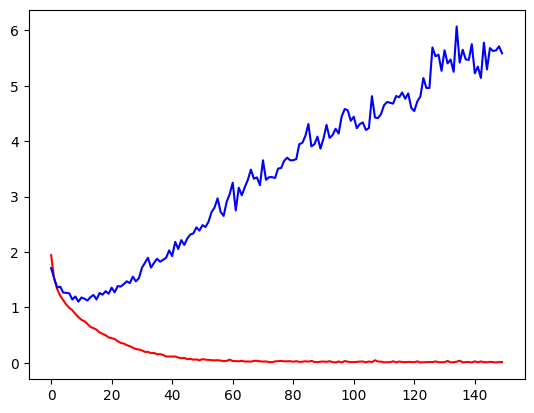

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.show()

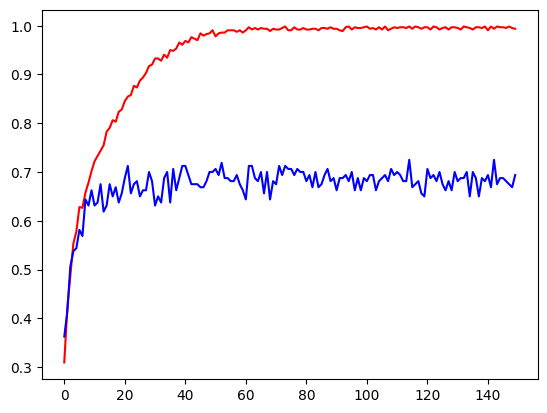

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.show()